# Aplicación de Transfer Learning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!pip install torchinfo

## Conjunto de datos a usar: 
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset

In [3]:
import torch
import torchvision
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
from torchinfo import summary
from torch.utils.data import DataLoader,TensorDataset,Dataset

import dl #Este código lo crea el GUI generador de Dataset
from helper_evaluation import compute_accuracy
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy

In [4]:
BATCH_SIZE = 32

### Crear Dataset con el código creado

In [5]:
Dataset = dl.ImageDataset()

In [6]:
print(len(Dataset))
l_ds = len(Dataset)

#Dividir el conjunto de datos en entrenamiento/validación/test
l_tr = int(round(l_ds*0.8))
l_valtest = int(l_ds - l_tr)

l_val = int(l_valtest*0.5)
l_test = int(l_valtest - l_val)


150


In [7]:
train_set, val_set = torch.utils.data.random_split(Dataset,[l_tr,l_valtest])
val_set, test_set = torch.utils.data.random_split(val_set,
                                                  [l_val, l_test])


In [8]:
print(len(train_set))
print(len(val_set))
print(len(test_set))

120
15
15


In [9]:
train_iterator = DataLoader(train_set,
                            batch_size = BATCH_SIZE, 
                            shuffle = True, 
                            num_workers = 2)

val_iterator = DataLoader(val_set,
                          batch_size = BATCH_SIZE)

test_iterator = DataLoader(test_set,
                           batch_size = BATCH_SIZE)

In [10]:
it_dl = iter(train_iterator)

In [11]:
image, label = next(it_dl)

In [12]:
print(image.shape)
print(label)

torch.Size([32, 1, 224, 224])
tensor([0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 2, 1])


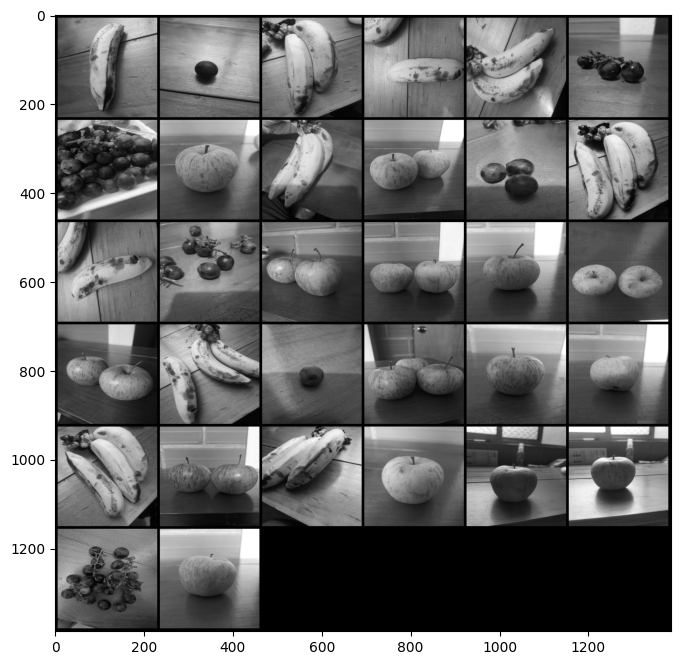

In [13]:
grid = torchvision.utils.make_grid(image, 6, 6)
plt.figure(figsize=(8,8))
plt.imshow(F.to_pil_image(grid))

In [14]:
for images, labels in train_iterator:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 224, 224])
Image label dimensions: torch.Size([32])


## Transfer Learning: Usar modelos preentrenados

In [17]:
!pip install timm

  Using cached timm-1.0.3-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.23.1-py3-none-any.whl.metadata (12 kB)
  Using cached safetensors-0.4.3-cp310-none-win_amd64.whl.metadata (3.9 kB)
Using cached timm-1.0.3-py3-none-any.whl (2.3 MB)
Using cached huggingface_hub-0.23.1-py3-none-any.whl (401 kB)
Using cached safetensors-0.4.3-cp310-none-win_amd64.whl (287 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\docenteitm.SALASFR\\AppData\\Local\\conda\\conda\\envs\\IA_ITM\\Lib\\site-packages\\huggingface_hub\\inference\\_generated\\_async_client.py'
Consider using the `--user` option or check the permissions.



In [20]:
import timm

In [21]:
# all_models = timm.list_models('mob*')
all_models = timm.list_models('eff*')
len(all_models)
all_models

['efficientformer_l1',
 'efficientformer_l3',
 'efficientformer_l7',
 'efficientformerv2_l',
 'efficientformerv2_s0',
 'efficientformerv2_s1',
 'efficientformerv2_s2',
 'efficientnet_b0',
 'efficientnet_b0_g8_gn',
 'efficientnet_b0_g16_evos',
 'efficientnet_b0_gn',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_g8_gn',
 'efficientnet_b3_gn',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_b8',
 'efficientnet_cc_b0_4e',
 'efficientnet_cc_b0_8e',
 'efficientnet_cc_b1_8e',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_l2',
 'efficientnet_lite0',
 'efficientnet_lite1',
 'efficientnet_lite2',
 'efficientnet_lite3',
 'efficientnet_lite4',
 'efficientnetv2_l',
 'efficientnetv2_m',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t',
 'e

In [22]:
model = timm.create_model('mobilenetv3_small_050', 
                          num_classes = 3, 
                          pretrained = True,
                          in_chans = 1)

model.safetensors:   0%|          | 0.00/6.42M [00:00<?, ?B/s]

C:\Users\docenteitm.SALASFR\AppData\Local\conda\conda\envs\IA_ITM\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\docenteitm.SALASFR\.cache\huggingface\hub\models--timm--mobilenetv3_small_050.lamb_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [23]:
model

MobileNetV3(
  (conv_stem): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): Hardswish()
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): ReLU(inplace=True)
          (conv_expand): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (gate): Hardsigmoid()
        )
        (conv_pw): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          8

In [25]:
summary(model, (32, 1, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
MobileNetV3                                   [32, 3]                   --
├─Conv2d: 1-1                                 [32, 16, 112, 112]        144
├─BatchNormAct2d: 1-2                         [32, 16, 112, 112]        32
│    └─Identity: 2-1                          [32, 16, 112, 112]        --
│    └─Hardswish: 2-2                         [32, 16, 112, 112]        --
├─Sequential: 1-3                             [32, 288, 7, 7]           --
│    └─Sequential: 2-3                        [32, 8, 56, 56]           --
│    │    └─DepthwiseSeparableConv: 3-1       [32, 8, 56, 56]           600
│    └─Sequential: 2-4                        [32, 16, 28, 28]          --
│    │    └─InvertedResidual: 3-2             [32, 16, 28, 28]          1,512
│    │    └─InvertedResidual: 3-3             [32, 16, 28, 28]          2,552
│    └─Sequential: 2-5                        [32, 24, 14, 14]          --
│    │    └─

### Uso del modelo

In [26]:
x = torch.randn(2, 1, 32, 32)
model(x).shape

torch.Size([2, 3])

In [27]:
model(x)

tensor([[18.2901, -7.8855,  6.0649],
        [-7.3734,  1.8523,  1.9644]], grad_fn=<AddmmBackward0>)

In [28]:
torch.nn.functional.softmax(model(x), dim=-1)

tensor([[1.0000e+00, 4.2862e-12, 4.9052e-06],
        [4.6479e-05, 4.7200e-01, 5.2795e-01]], grad_fn=<SoftmaxBackward0>)

In [29]:
NUM_EPOCHS = 10
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Resultado de modelo preentrenado

In [30]:
compute_accuracy(model, test_iterator, DEVICE)

tensor(13.3333)

## Congelar parámetros menos FC

In [31]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv_stem.weight True
bn1.weight True
bn1.bias True
blocks.0.0.conv_dw.weight True
blocks.0.0.bn1.weight True
blocks.0.0.bn1.bias True
blocks.0.0.se.conv_reduce.weight True
blocks.0.0.se.conv_reduce.bias True
blocks.0.0.se.conv_expand.weight True
blocks.0.0.se.conv_expand.bias True
blocks.0.0.conv_pw.weight True
blocks.0.0.bn2.weight True
blocks.0.0.bn2.bias True
blocks.1.0.conv_pw.weight True
blocks.1.0.bn1.weight True
blocks.1.0.bn1.bias True
blocks.1.0.conv_dw.weight True
blocks.1.0.bn2.weight True
blocks.1.0.bn2.bias True
blocks.1.0.conv_pwl.weight True
blocks.1.0.bn3.weight True
blocks.1.0.bn3.bias True
blocks.1.1.conv_pw.weight True
blocks.1.1.bn1.weight True
blocks.1.1.bn1.bias True
blocks.1.1.conv_dw.weight True
blocks.1.1.bn2.weight True
blocks.1.1.bn2.bias True
blocks.1.1.conv_pwl.weight True
blocks.1.1.bn3.weight True
blocks.1.1.bn3.bias True
blocks.2.0.conv_pw.weight True
blocks.2.0.bn1.weight True
blocks.2.0.bn1.bias True
blocks.2.0.conv_dw.weight True
blocks.2.0.bn2.weigh

In [32]:
for param in model.parameters():
    param.requires_grad = False

In [33]:
model.classifier.weight.requires_grad = True
model.classifier.bias.requires_grad = True

In [34]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv_stem.weight False
bn1.weight False
bn1.bias False
blocks.0.0.conv_dw.weight False
blocks.0.0.bn1.weight False
blocks.0.0.bn1.bias False
blocks.0.0.se.conv_reduce.weight False
blocks.0.0.se.conv_reduce.bias False
blocks.0.0.se.conv_expand.weight False
blocks.0.0.se.conv_expand.bias False
blocks.0.0.conv_pw.weight False
blocks.0.0.bn2.weight False
blocks.0.0.bn2.bias False
blocks.1.0.conv_pw.weight False
blocks.1.0.bn1.weight False
blocks.1.0.bn1.bias False
blocks.1.0.conv_dw.weight False
blocks.1.0.bn2.weight False
blocks.1.0.bn2.bias False
blocks.1.0.conv_pwl.weight False
blocks.1.0.bn3.weight False
blocks.1.0.bn3.bias False
blocks.1.1.conv_pw.weight False
blocks.1.1.bn1.weight False
blocks.1.1.bn1.bias False
blocks.1.1.conv_dw.weight False
blocks.1.1.bn2.weight False
blocks.1.1.bn2.bias False
blocks.1.1.conv_pwl.weight False
blocks.1.1.bn3.weight False
blocks.1.1.bn3.bias False
blocks.2.0.conv_pw.weight False
blocks.2.0.bn1.weight False
blocks.2.0.bn1.bias False
blocks.2.0.conv_d

In [35]:
summary(model, (32,1, 32, 32))


Layer (type:depth-idx)                        Output Shape              Param #
MobileNetV3                                   [32, 3]                   --
├─Conv2d: 1-1                                 [32, 16, 16, 16]          (144)
├─BatchNormAct2d: 1-2                         [32, 16, 16, 16]          32
│    └─Identity: 2-1                          [32, 16, 16, 16]          --
│    └─Hardswish: 2-2                         [32, 16, 16, 16]          --
├─Sequential: 1-3                             [32, 288, 1, 1]           --
│    └─Sequential: 2-3                        [32, 8, 8, 8]             --
│    │    └─DepthwiseSeparableConv: 3-1       [32, 8, 8, 8]             (600)
│    └─Sequential: 2-4                        [32, 16, 4, 4]            --
│    │    └─InvertedResidual: 3-2             [32, 16, 4, 4]            (1,512)
│    │    └─InvertedResidual: 3-3             [32, 16, 4, 4]            (2,552)
│    └─Sequential: 2-5                        [32, 24, 2, 2]            --
│   

In [36]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_iterator,
    valid_loader=val_iterator,
    test_loader=test_iterator,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=300)

C:\Users\docenteitm.SALASFR\AppData\Local\conda\conda\envs\IA_ITM\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 001/010 | Batch 0000/0004 | Loss: 3.9067
Epoch: 001/010 | Train: 28.33% | Validation: 20.00%
Time elapsed: 0.50 min
Epoch: 002/010 | Batch 0000/0004 | Loss: 2.0757
Epoch: 002/010 | Train: 30.00% | Validation: 40.00%
Time elapsed: 0.99 min
Epoch: 003/010 | Batch 0000/0004 | Loss: 1.4410
Epoch: 003/010 | Train: 35.83% | Validation: 46.67%
Time elapsed: 1.48 min
Epoch: 004/010 | Batch 0000/0004 | Loss: 1.5082
Epoch: 004/010 | Train: 38.33% | Validation: 46.67%
Time elapsed: 1.97 min
Epoch: 005/010 | Batch 0000/0004 | Loss: 0.9362
Epoch: 005/010 | Train: 53.33% | Validation: 53.33%
Time elapsed: 2.46 min
Epoch: 006/010 | Batch 0000/0004 | Loss: 0.5187
Epoch: 006/010 | Train: 57.50% | Validation: 53.33%
Time elapsed: 2.95 min
Epoch: 007/010 | Batch 0000/0004 | Loss: 0.3817
Epoch: 007/010 | Train: 66.67% | Validation: 66.67%
Time elapsed: 3.45 min
Epoch: 008/010 | Batch 0000/0004 | Loss: 0.3435
Epoch: 008/010 | Train: 59.17% | Validation: 60.00%
Time elapsed: 3.94 min
Epoch: 009/010 |

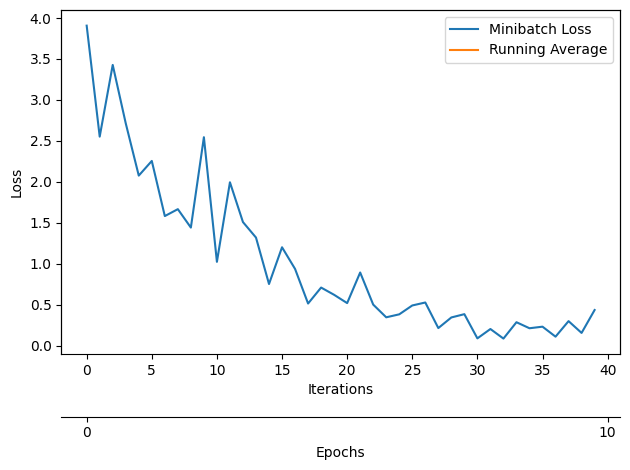

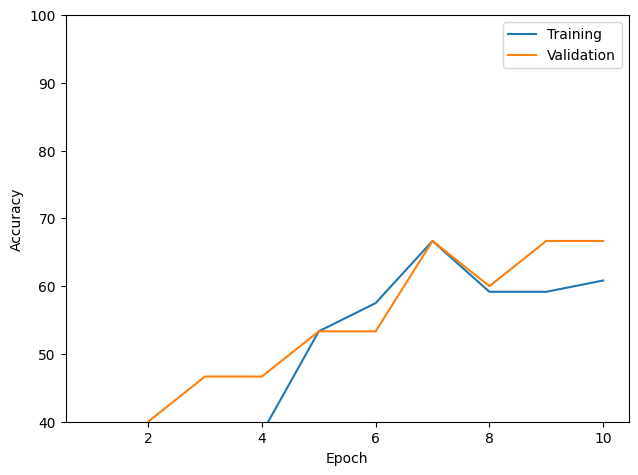

In [37]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_iterator),
                   results_dir=None,
                   averaging_iterations=40)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([40, 100])
plt.show()

In [38]:
compute_accuracy(model, test_iterator, DEVICE)

tensor(53.3333)

## Entrenar modelo completo

In [39]:
model = timm.create_model('mobilenetv3_small_050', 
                          num_classes = 3, 
                          pretrained = True,
                          in_chans = 1)

In [40]:
for param in model.parameters():
    print(param.requires_grad,end=' ')

True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True True 

In [41]:
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), momentum=0.9, lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       factor=0.1,
                                                       mode='max',
                                                       verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_iterator,
    valid_loader=val_iterator,
    test_loader=test_iterator,
    optimizer=optimizer,
    device=DEVICE,
    scheduler=scheduler,
    scheduler_on='valid_acc',
    logging_interval=500)

C:\Users\docenteitm.SALASFR\AppData\Local\conda\conda\envs\IA_ITM\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch: 001/010 | Batch 0000/0004 | Loss: 3.6643
Epoch: 001/010 | Train: 35.00% | Validation: 26.67%
Time elapsed: 0.50 min
Epoch: 002/010 | Batch 0000/0004 | Loss: 0.7637
Epoch: 002/010 | Train: 30.83% | Validation: 40.00%
Time elapsed: 1.00 min
Epoch: 003/010 | Batch 0000/0004 | Loss: 0.2860
Epoch: 003/010 | Train: 30.00% | Validation: 40.00%
Time elapsed: 1.50 min
Epoch: 004/010 | Batch 0000/0004 | Loss: 0.0468
Epoch: 004/010 | Train: 44.17% | Validation: 40.00%
Time elapsed: 2.01 min
Epoch: 005/010 | Batch 0000/0004 | Loss: 0.0133
Epoch: 005/010 | Train: 53.33% | Validation: 66.67%
Time elapsed: 2.51 min
Epoch: 006/010 | Batch 0000/0004 | Loss: 0.0033
Epoch: 006/010 | Train: 49.17% | Validation: 40.00%
Time elapsed: 3.01 min
Epoch: 007/010 | Batch 0000/0004 | Loss: 0.0126
Epoch: 007/010 | Train: 69.17% | Validation: 66.67%
Time elapsed: 3.52 min
Epoch: 008/010 | Batch 0000/0004 | Loss: 0.0162
Epoch: 008/010 | Train: 85.83% | Validation: 80.00%
Time elapsed: 4.02 min
Epoch: 009/010 |

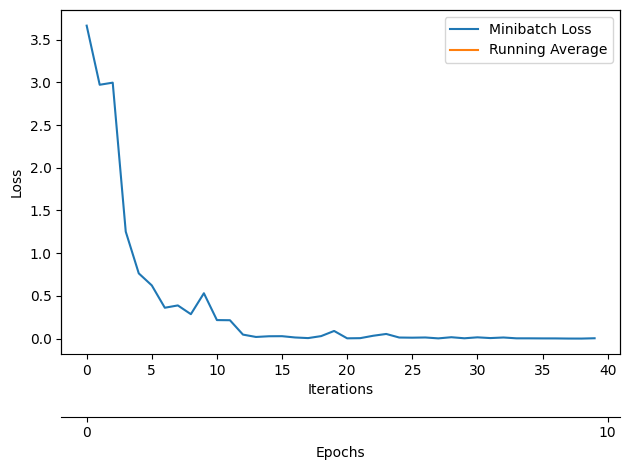

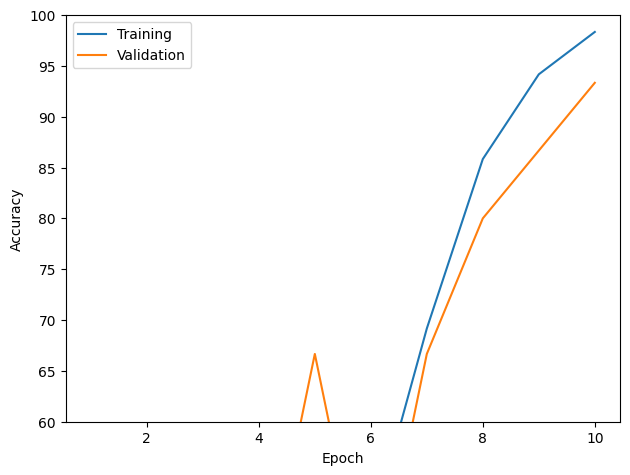

In [42]:
plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_iterator),
                   results_dir=None,
                   averaging_iterations=40)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([60, 100])
plt.show()

In [43]:
compute_accuracy(model, test_iterator, DEVICE)

tensor(100.)